<h1>Hands-On - CHICAGO CRIMES DATA ANALYTICS PROJECT</h1>
<hr>
<h1>Analyst : Joshua Z. Deñado</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('datasets\\Chicago_Crimes.csv')
df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h2>Checking the Data Types</h2>

In [3]:
df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                      int64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [4]:
df['Block'] = df['Block'].astype('category')
df['Primary Type'] = df['Primary Type'].astype('category')
# df['Description'] = df['Description'].astype('category')
# df['Location Description'] = df['Location Description'].astype('category')
df['District'] = df['District'].astype('category')
df['Community Area'] = df['Community Area'].astype('category')
df['FBI Code'] = df['FBI Code'].astype('category')
df['IUCR'] = df['IUCR'].astype('category')
df.dtypes

ID                         int64
Case Number               object
Date                      object
Block                   category
IUCR                    category
Primary Type            category
Description               object
Location Description      object
Arrest                      bool
Domestic                    bool
Beat                       int64
District                category
Ward                       int64
Community Area          category
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On                object
Latitude                 float64
Longitude                float64
Location                  object
dtype: object

<h2>Checking Null Values</h2>

In [5]:
df.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<h2>Cleaning the Data Frame</h2>

In [6]:
df['Location Description'] = df['Location Description'].fillna(df['Location Description'].mode()[0])
df['Community Area'] = df['Community Area'].fillna(df['Community Area'].mode()[0])
df['X Coordinate'] = df['X Coordinate'].fillna(df['X Coordinate'].mean())
df['Y Coordinate'] = df['Y Coordinate'].fillna(df['Y Coordinate'].mean())
df['Latitude'] = df['Latitude'].fillna(df['Latitude'].mean())
df['Longitude'] = df['Longitude'].fillna(df['Longitude'].mean())
df['Location'] = df['Location'].fillna(df['Location'].mode()[0])
df.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

<h1 style="color:red;">Explanatory Data Analytics (EDA)</h1>

<h1>1. Analysing Chicago Crimes</h1>

In [7]:
types_crime = df['Primary Type'].value_counts()
print(f'{types_crime},\n\nTotal : {types_crime.sum()}')

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

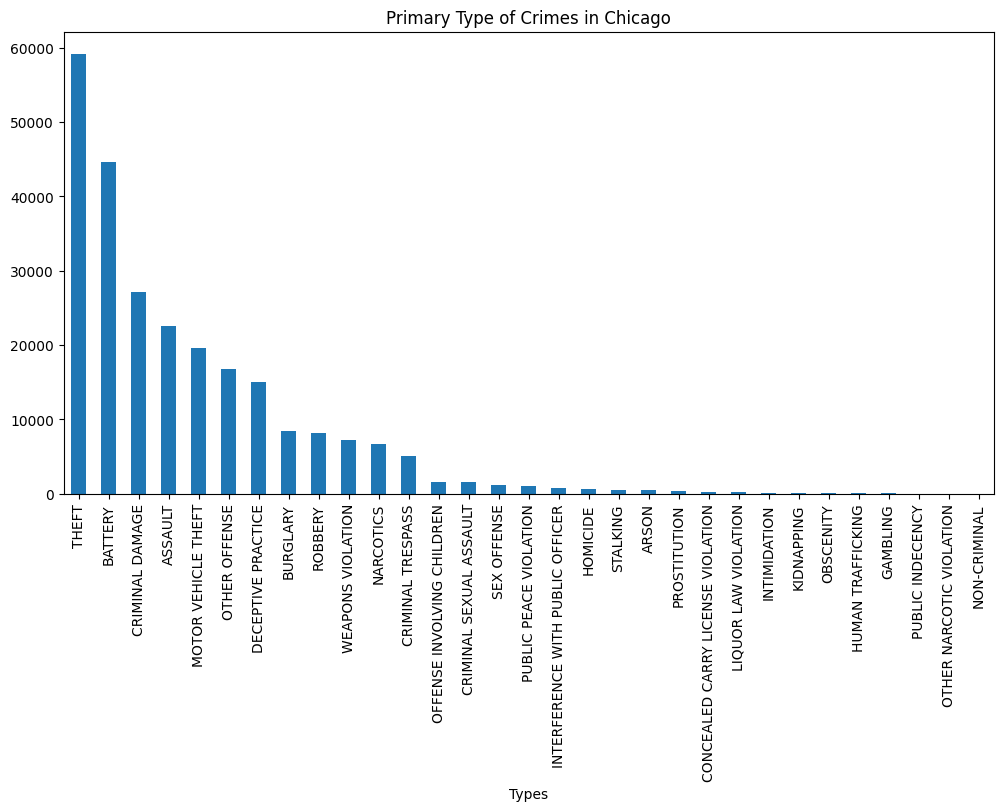

In [8]:
types_crime = df['Primary Type'].value_counts().plot(kind='bar')
plt.gcf().set_size_inches(12, 6)
plt.title('Primary Type of Crimes in Chicago')
plt.xlabel('Types')
plt.show()

INSIGHT 1 : From the data presented in this table, it is evident that theft is the most common type of crime committed in Chicago. This indicates that property-related crimes remain a significant issue for the city, highlighting the need for stronger preventive measures and community awareness.

<h2>Kidnapping Analysis</h2>

In [9]:
df.dtypes

ID                         int64
Case Number               object
Date                      object
Block                   category
IUCR                    category
Primary Type            category
Description               object
Location Description      object
Arrest                      bool
Domestic                    bool
Beat                       int64
District                category
Ward                       int64
Community Area          category
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On                object
Latitude                 float64
Longitude                float64
Location                  object
dtype: object

In [10]:
chicago_kidnapping_df = df[df['Primary Type'] == 'KIDNAPPING']

theft_locations  = list(zip(chicago_kidnapping_df['Latitude'], chicago_kidnapping_df['Longitude']))
chicago_map = folium.Map(location=[chicago_kidnapping_df['Latitude'].mean(), chicago_kidnapping_df['Longitude'].mean()], zoom_start=11)
HeatMap(theft_locations).add_to(chicago_map)
chicago_map.save('kidnapping_crimes_heatmap.html')
chicago_map

INSIGHT 2 : The heatmap analysis clearly identifies the areas where kidnapping incidents are most concentrated. Based on the visualization, the neighborhoods most affected include South Chicago, Chicago Lawn, Oakland, Gage Park, Kenwood, and Jefferson Park. These findings suggest that certain areas are more vulnerable and may require additional law enforcement presence.

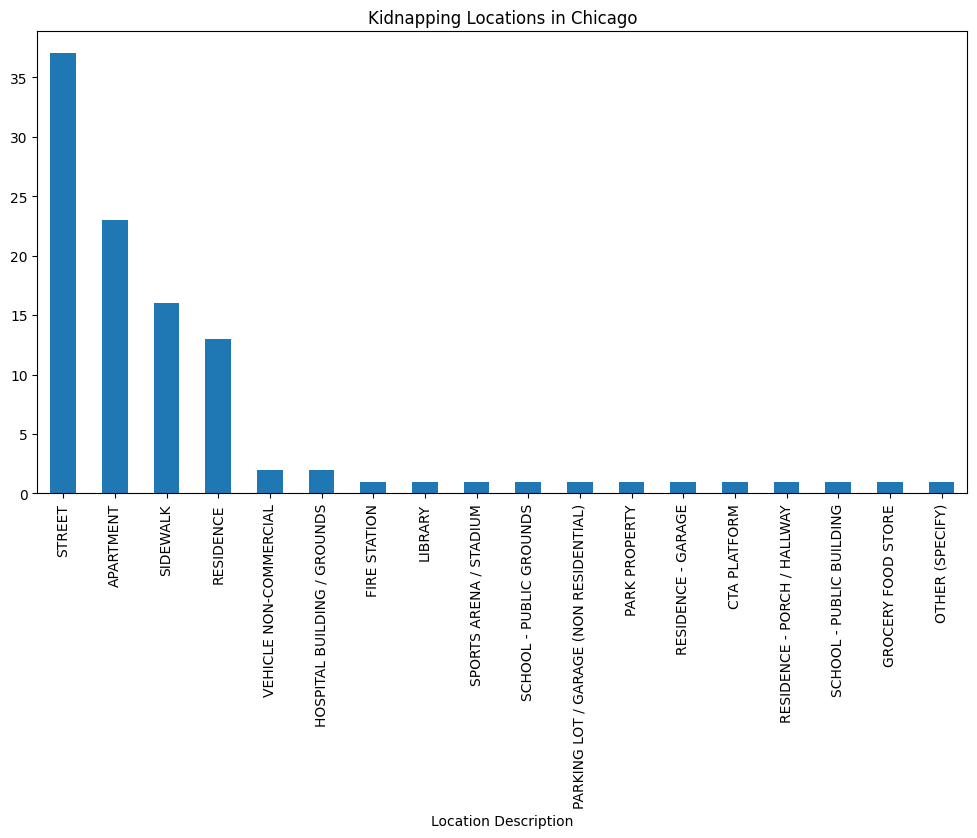

In [11]:
chicago_kidnapping_df['Location Description'].value_counts().plot(kind='bar')
plt.title('Kidnapping Locations in Chicago')
plt.gcf().set_size_inches(12, 6)

INSIGHT 3 : As we can see it shows that streets are the most common sites, followed closely by apartments. This trend is further supported by the heatmap visualization, which confirms that public and residential areas are hotspots for such incidents.

<h2>Robbery Analysis</h2>

In [12]:
chicago_robbery_df = df[df['Primary Type'] == 'ROBBERY']

robbery_locations  = list(zip(chicago_robbery_df['Latitude'], chicago_robbery_df['Longitude']))
chicago_map = folium.Map(location=[chicago_robbery_df['Latitude'].mean(), chicago_robbery_df['Longitude'].mean()], zoom_start=11)
HeatMap(robbery_locations).add_to(chicago_map)
chicago_map.save('robbery_crimes_heatmap.html')
chicago_map

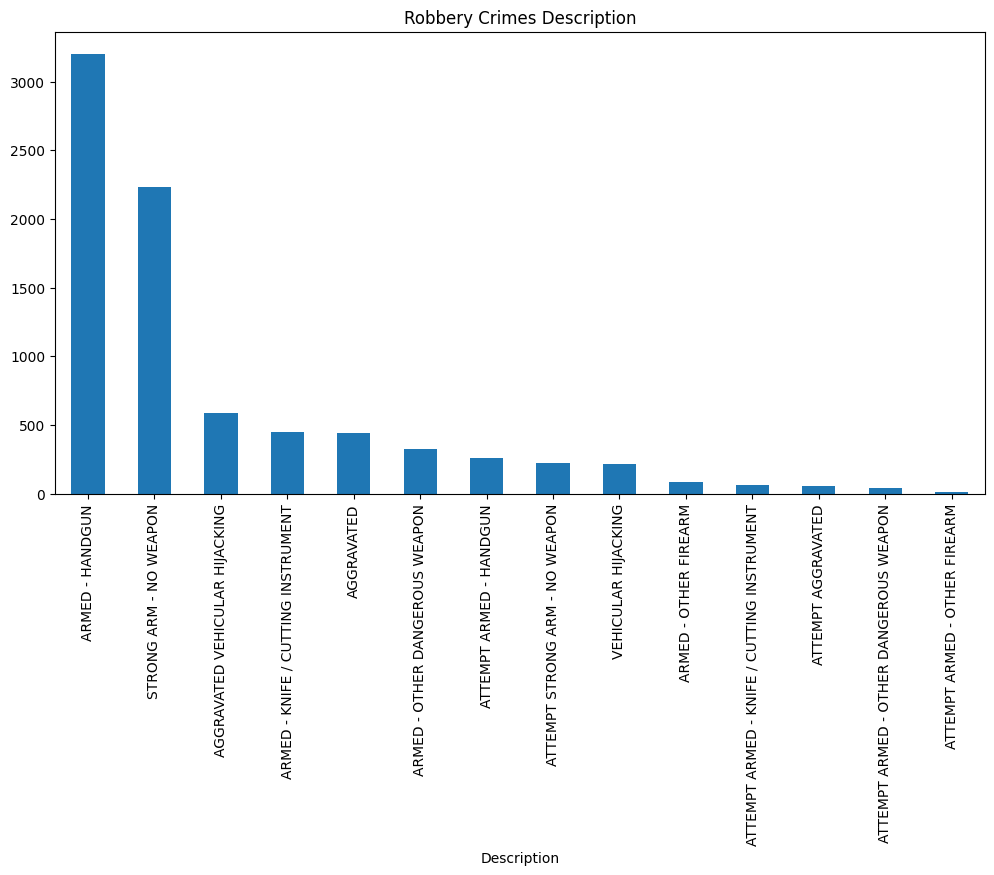

In [13]:
chicago_robbery_df['Description'].value_counts().plot(kind='bar')
plt.title('Robbery Crimes Description')
plt.gcf().set_size_inches(12, 6)

INSIGHT 4 : The data reveals that most robberies are committed by offenders armed with handguns. However, there are still a notable number of cases where no weapon was used.

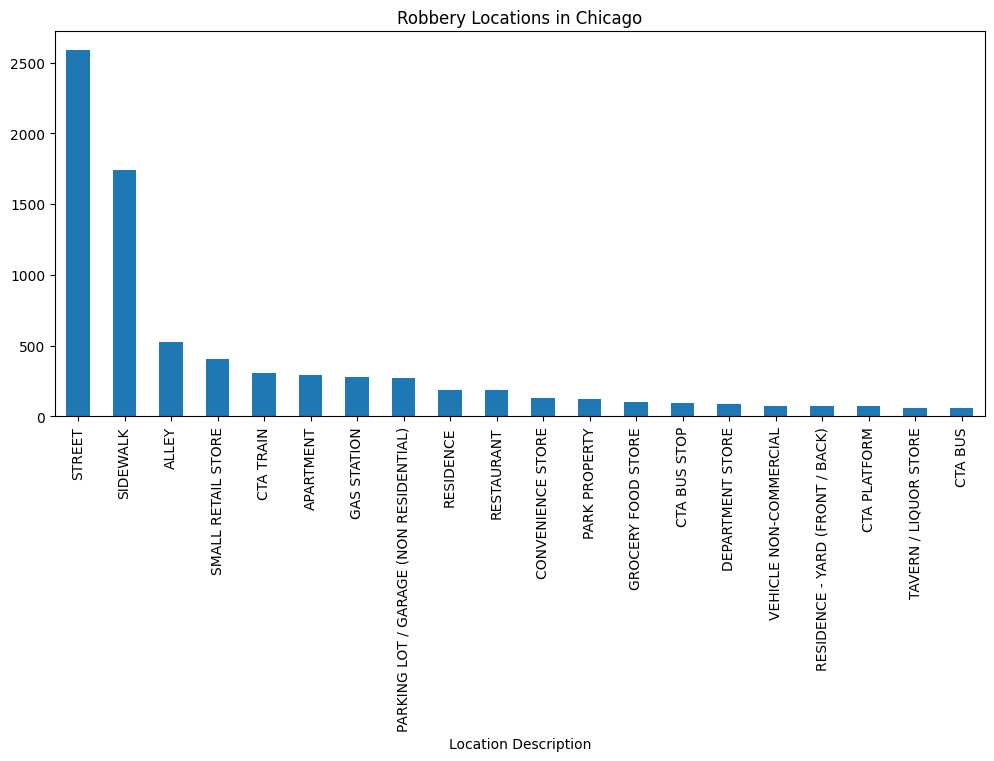

In [14]:
chicago_robbery_df['Location Description'].value_counts().head(20).plot(kind='bar') # I just make it shows the top 20 locations
plt.title('Robbery Locations in Chicago')
plt.gcf().set_size_inches(12, 5)

INSIGHT 5 : Just like kidnappings, robberies also occur most frequently on the streets. This highlights that public spaces remain a high-risk environment where individuals are more likely to encounter crime.

<h2>Arson Analysis</h2>

In [15]:
chicago_arson_df = df[df['Primary Type'] == 'ARSON']

arson_locations  = list(zip(chicago_arson_df['Latitude'], chicago_arson_df['Longitude']))
chicago_map = folium.Map(location=[chicago_arson_df['Latitude'].mean(), chicago_arson_df['Longitude'].mean()], zoom_start=11)
HeatMap(arson_locations).add_to(chicago_map)
chicago_map.save('arson_crimes_heatmap.html')
chicago_map

INSIGHT 6 : The heatmap of arson incidents shows that most cases are concentrated in specific neighborhoods such as West Pullman, Cheltenham, the Loop, North Lawndale, Austin, Humboldt Park, and Greater Grand Crossing. These locations may require targeted fire safety awareness programs and stronger enforcement measures.

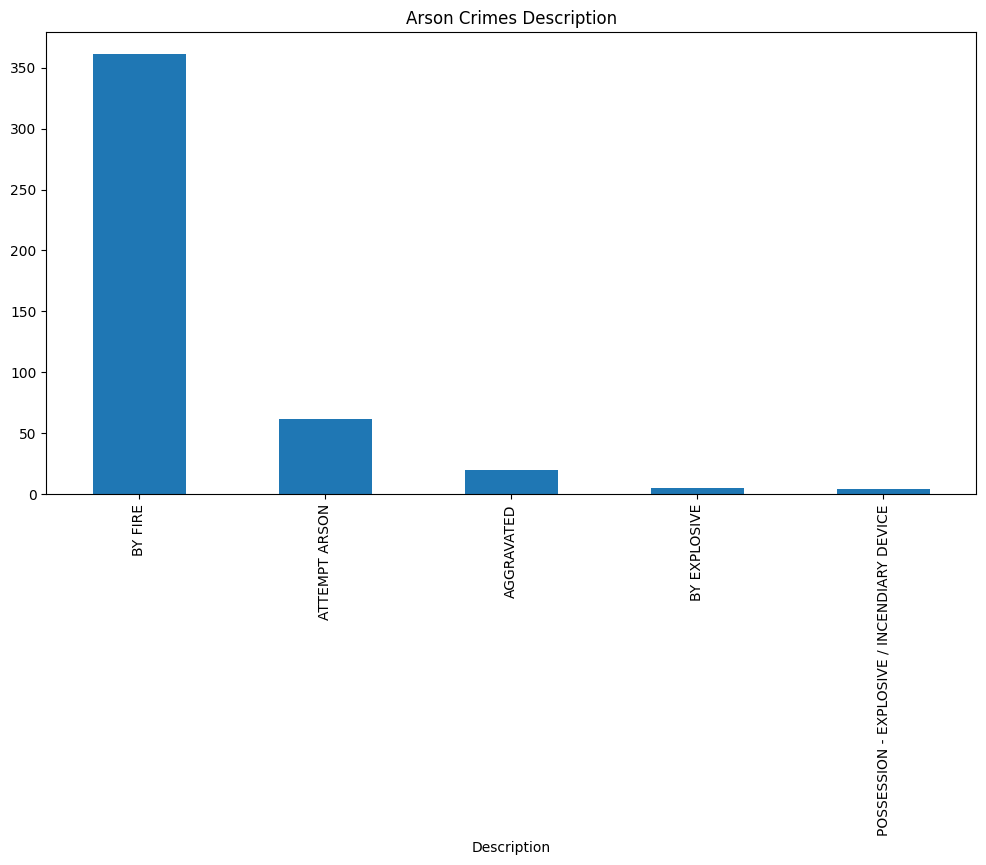

In [16]:
chicago_arson_df['Description'].value_counts().plot(kind='bar')
plt.title('Arson Crimes Description')
plt.gcf().set_size_inches(12, 6)

INSIGHT 7 : When examining the types of arson cases, the majority are caused by fire, followed by attempted arson. The least common cases involve the use or possession of explosive or incendiary devices, which, though rare, still pose a significant threat.

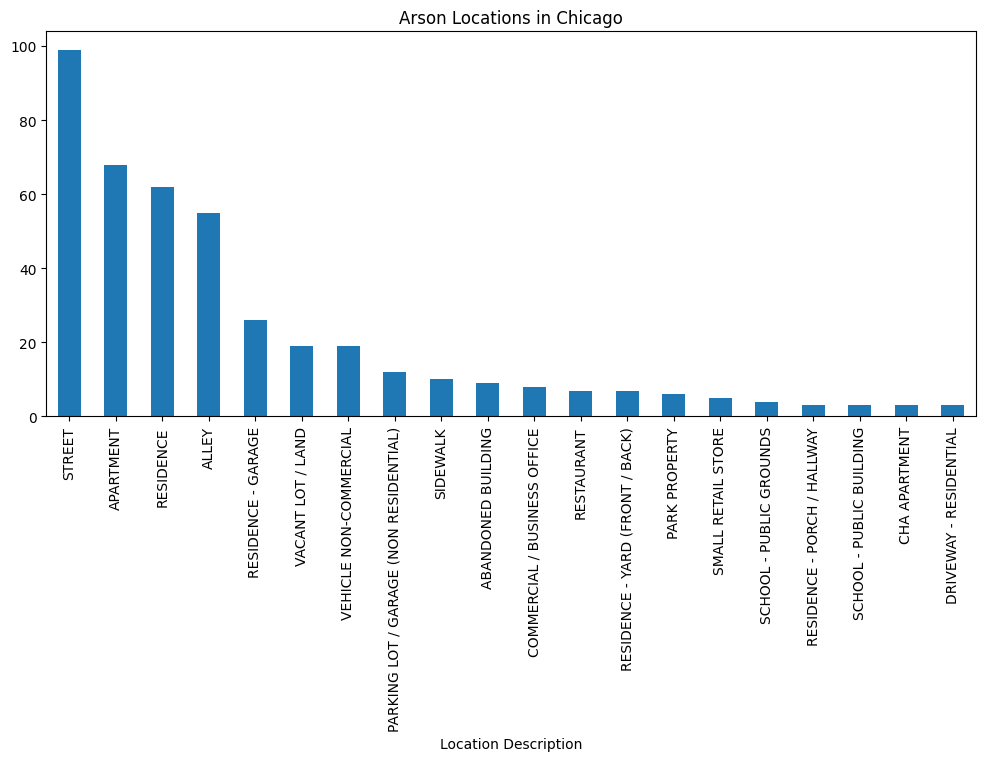

In [17]:
chicago_arson_df['Location Description'].value_counts().head(20).plot(kind='bar') # I just make it shows the top 20 locations
plt.title('Arson Locations in Chicago')
plt.gcf().set_size_inches(12, 5)

INSIGHT 8 : Similar to other crimes, the most common location for arson incidents is the street. However, apartments and alleys also show a considerable number of cases, suggesting that both public and residential spaces are vulnerable to such destructive acts.

<h2>Liquor Law Violation Analysis</h2>

In [18]:
chicago_liquor_df = df[df['Primary Type'] == 'LIQUOR LAW VIOLATION']

liquor_locations  = list(zip(chicago_liquor_df['Latitude'], chicago_liquor_df['Longitude']))
chicago_map = folium.Map(location=[chicago_liquor_df['Latitude'].mean(), chicago_liquor_df['Longitude'].mean()], zoom_start=11)
HeatMap(liquor_locations).add_to(chicago_map)
chicago_map.save('liquor_crimes_heatmap.html')
chicago_map

INSIGHT 9 : The heatmap reveals that liquor law violations are highly concentrated in the River North area. This neighborhood stands out as the primary hotspot for such crimes, indicating a strong link between nightlife activities and liquor-related offenses.

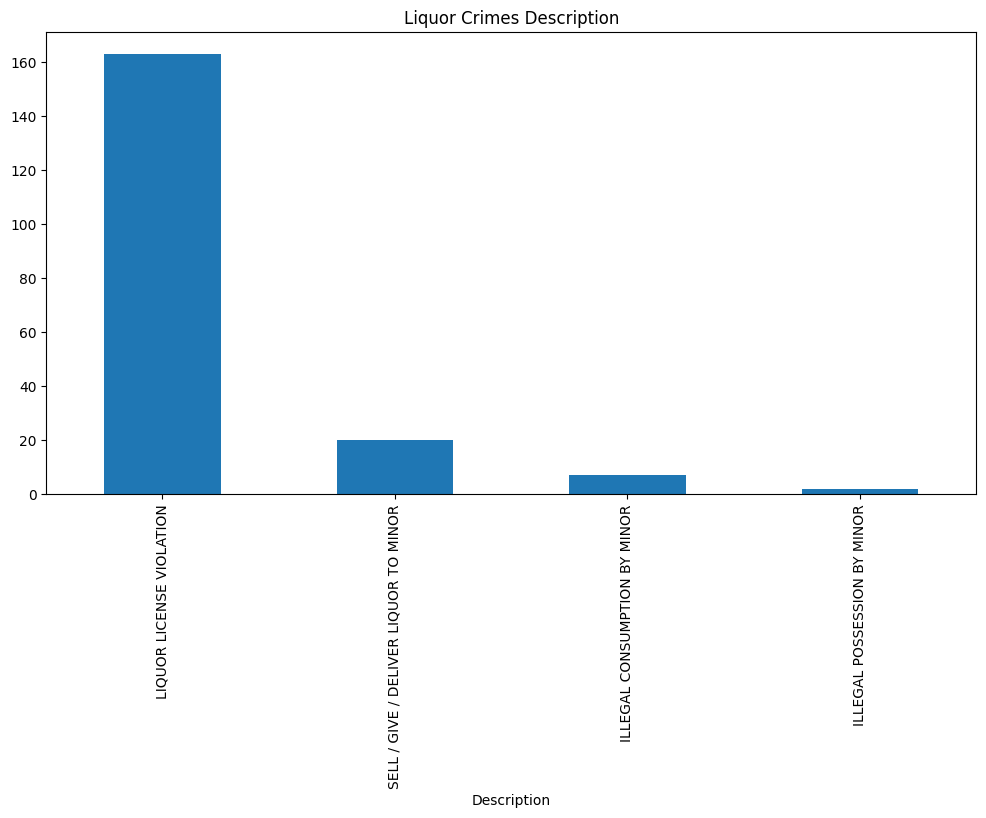

In [19]:
chicago_liquor_df['Description'].value_counts().plot(kind='bar')
plt.title('Liquor Crimes Description')
plt.gcf().set_size_inches(12, 6)

INSIGHT 10 : Looking at the reasons behind liquor-related arrests, the data shows that most store owners were apprehended for liquor license violations. In contrast, the least common reason for arrests was illegal possession of alcohol by minors, suggesting enforcement efforts focus more on businesses than individuals

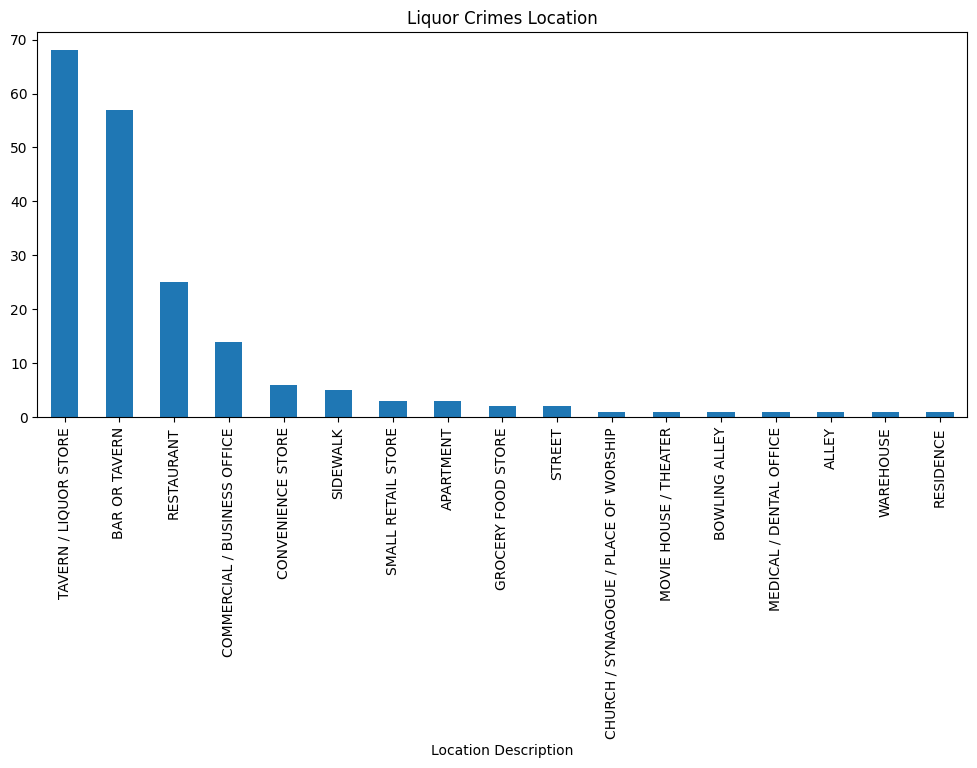

In [20]:
chicago_liquor_df['Location Description'].value_counts().plot(kind='bar')
plt.title('Liquor Crimes Location')
plt.gcf().set_size_inches(12, 5)

INSIGHT 11 : Taverns and liquor stores are identified as the main locations where liquor law violations occur. This finding aligns with expectations, as these establishments are directly linked to the sale and regulation of alcohol.

<h2>Battery Analysis</h2>

In [21]:
chicago_battery_df = df[df['Primary Type'] == 'BATTERY']

battery_locations  = list(zip(chicago_battery_df['Latitude'], chicago_battery_df['Longitude']))
chicago_map = folium.Map(location=[chicago_battery_df['Latitude'].mean(), chicago_battery_df['Longitude'].mean()], zoom_start=11)
HeatMap(battery_locations).add_to(chicago_map)
chicago_map.save('battery_crimes_heatmap.html')
chicago_map

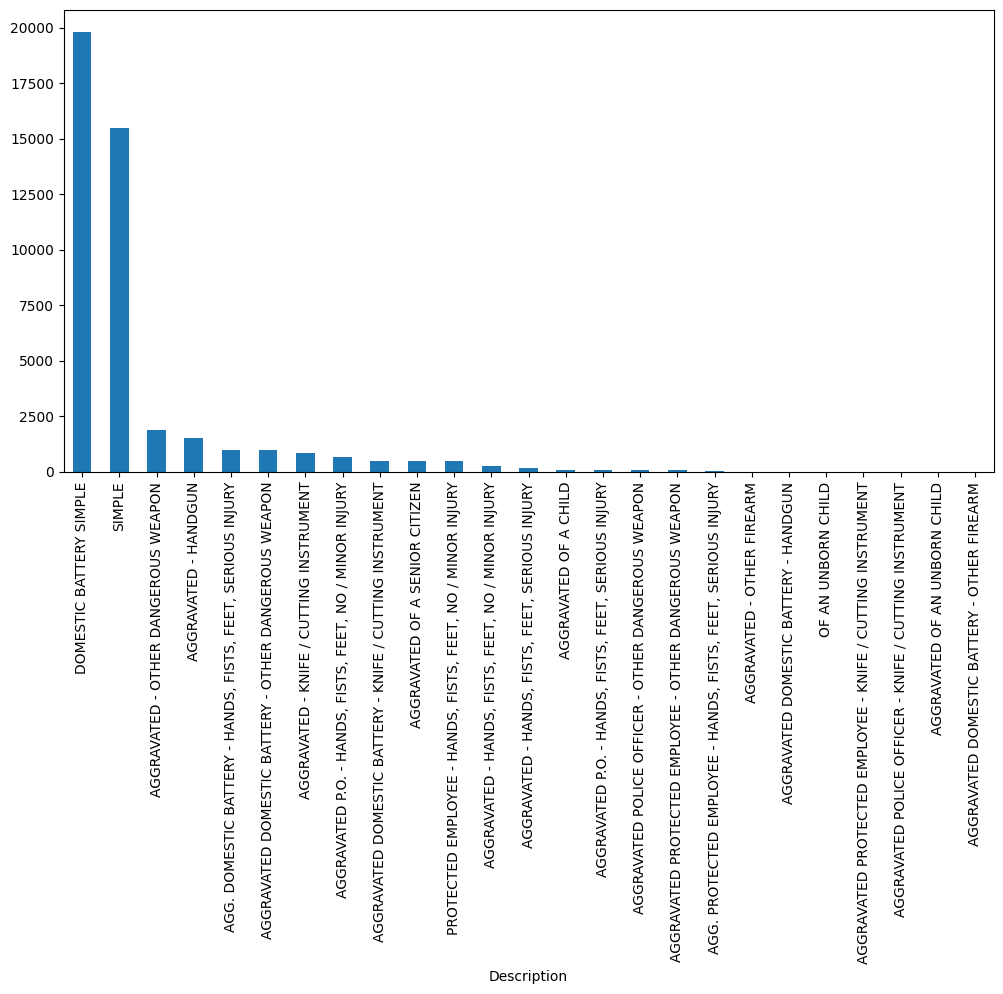

In [22]:
chicago_battery_df['Description'].value_counts().plot(kind='bar')
plt.gcf().set_size_inches(12, 6)

INSIGHT 12 : The data shows that simple domestic battery is the most common type of battery offense. This highlights the prevalence of domestic-related violence, which remains a pressing social and public safety concern in Chicago.

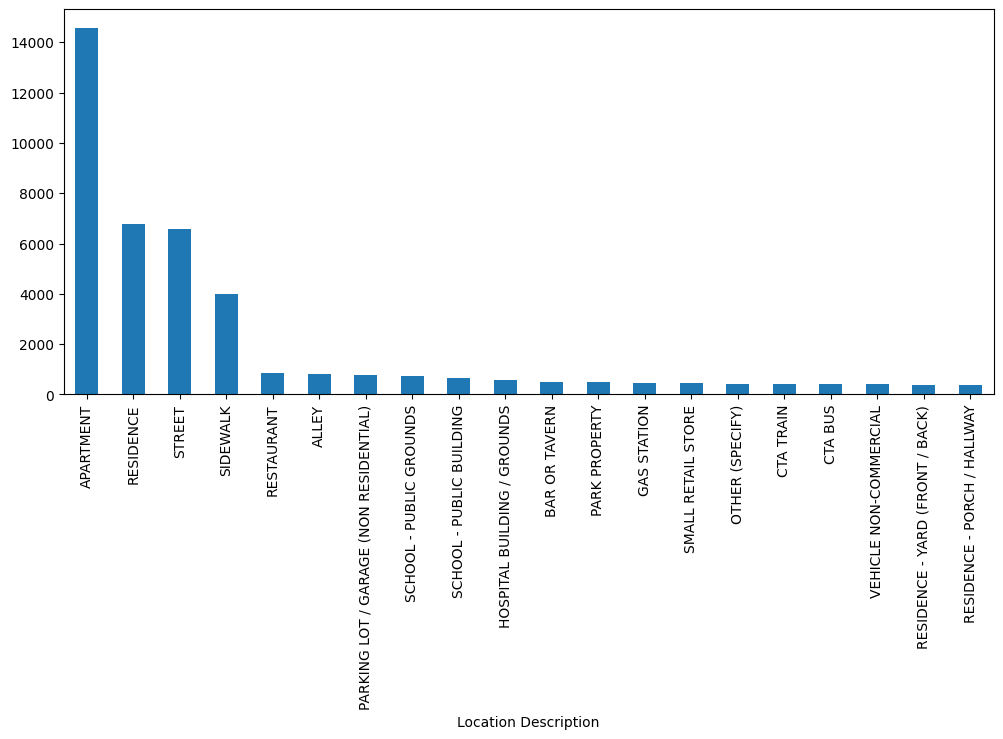

In [23]:
chicago_battery_df['Location Description'].value_counts().head(20).plot(kind='bar')
plt.gcf().set_size_inches(12, 5)

INSIGHT 13 : Battery crimes are most commonly reported in apartments, according to the data. This suggests that residential environments, particularly multi-unit dwellings, are frequent locations for such offenses.

<h2>Weapons Violation Analysis</h2>

In [24]:
chicago_weapons_df = df[df['Primary Type'] == 'WEAPONS VIOLATION']

weapons_locations  = list(zip(chicago_weapons_df['Latitude'], chicago_weapons_df['Longitude']))
chicago_map = folium.Map(location=[chicago_weapons_df['Latitude'].mean(), chicago_weapons_df['Longitude'].mean()], zoom_start=11)
HeatMap(weapons_locations).add_to(chicago_map)
chicago_map.save('weapon_crimes_heatmap.html')
chicago_map

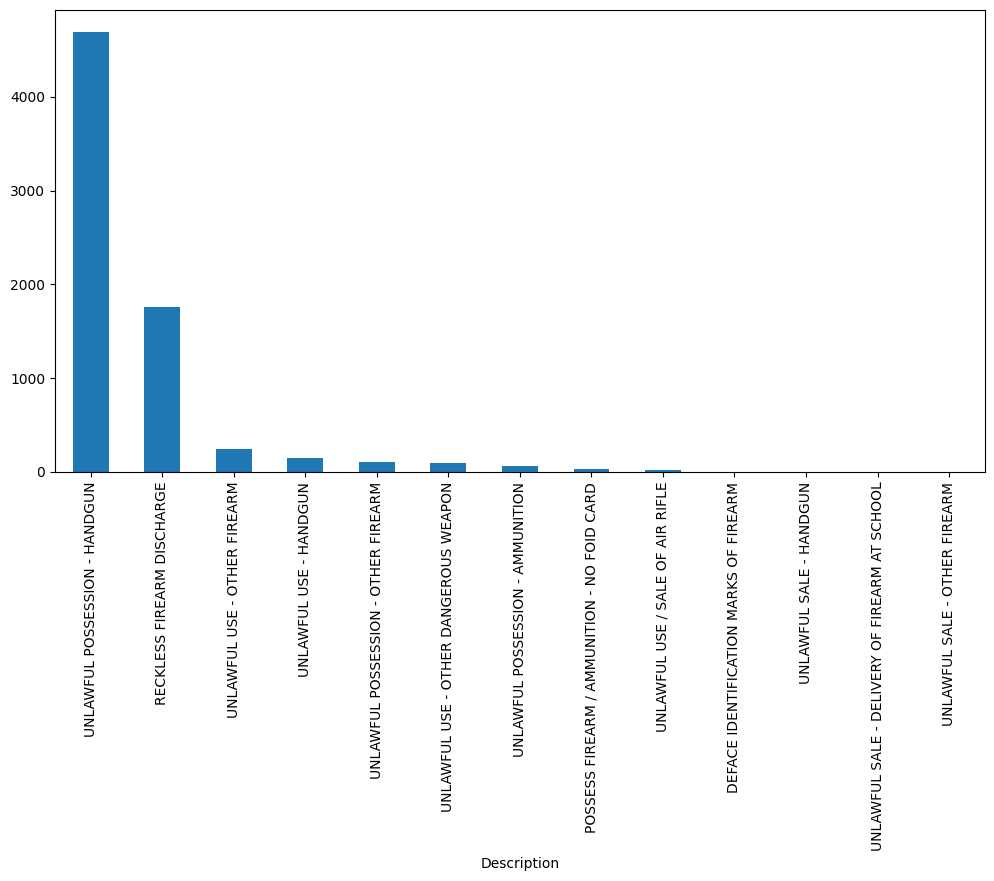

In [25]:
chicago_weapons_df['Description'].value_counts().plot(kind='bar')
plt.gcf().set_size_inches(12, 6)

INSIGHT 14 : Among weapon-related crimes, unlawful possession of a handgun accounts for the highest number of cases. This underscores the ongoing issue of illegal firearm possession in the city, which has direct implications for overall public safety.

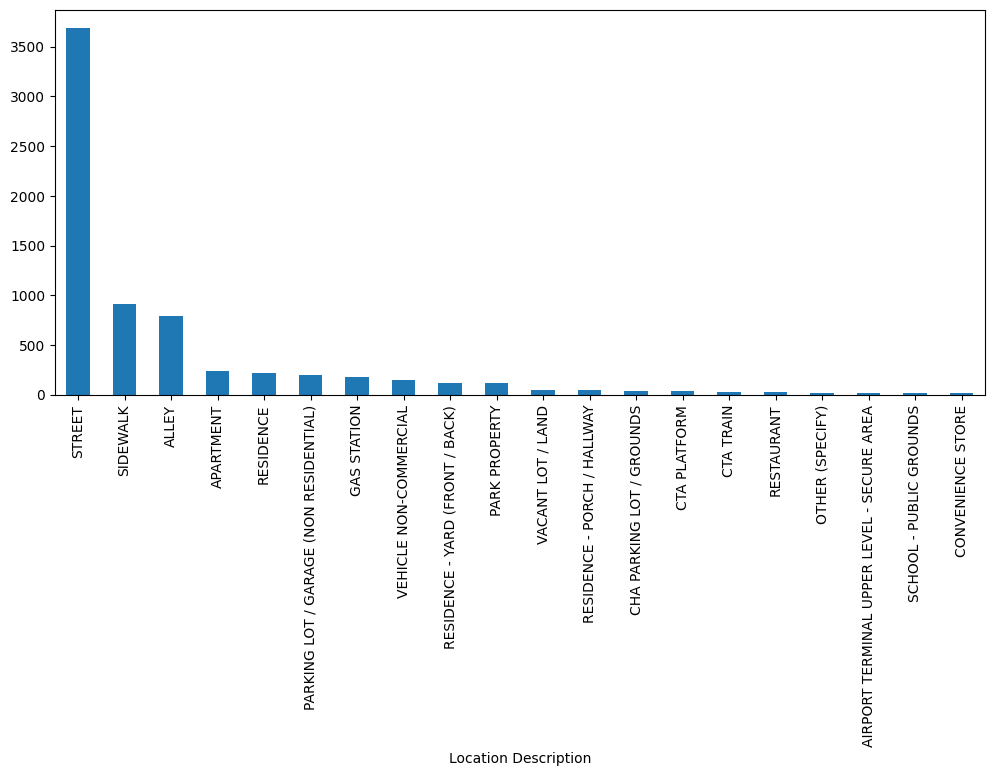

In [26]:
chicago_weapons_df['Location Description'].value_counts().head(20).plot(kind='bar')
plt.gcf().set_size_inches(12, 5)

INSIGHT 15 : Streets remain the most common location for weapons violations, similar to other crimes like robbery and kidnapping. This pattern reinforces the risks associated with public spaces in Chicago.

In [27]:
chicago_gambling_df = df[df['Primary Type'] == 'GAMBLING']

gambling_locations  = list(zip(chicago_gambling_df['Latitude'], chicago_gambling_df['Longitude']))
chicago_map = folium.Map(location=[chicago_gambling_df['Latitude'].mean(), chicago_gambling_df['Longitude'].mean()], zoom_start=11)
HeatMap(gambling_locations).add_to(chicago_map)
chicago_map.save('gambling_crimes_heatmap.html')
chicago_map

INSIGHT 16 : From the heatmap visualization, we can identify the neighborhoods where gambling crimes are most frequently reported. These areas include Roseland, Auburn Gresham, Washington Park, Grand Boulevard, the Loop, Near North Side, Near West Side, Humboldt Park, and Logan Square. This shows that gambling-related offenses are spread across both residential and commercial districts in Chicago.

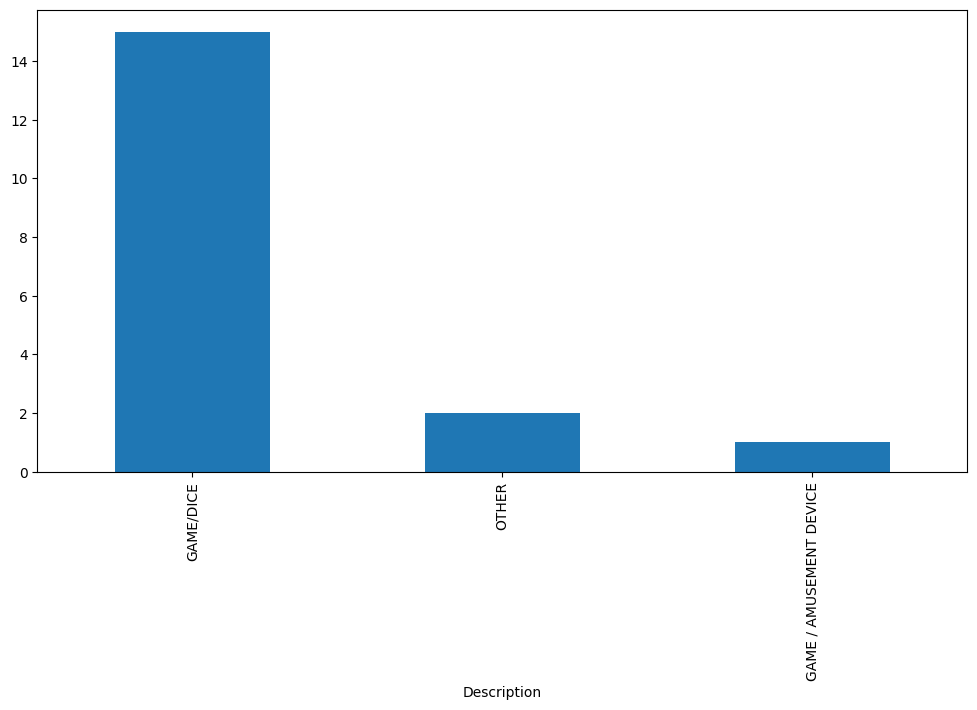

In [28]:
chicago_gambling_df['Description'].value_counts().plot(kind='bar')
plt.gcf().set_size_inches(12, 6)

INSIGHT 17 : The data further shows that the majority of gambling crimes are linked to games of dice. This category recorded the highest number of offenses, suggesting that informal or street-based gambling remains a significant driver of this type of crime in the city.

<h1>2. Which year has the most crimes happen?</h1>

In [29]:
df.dtypes

ID                         int64
Case Number               object
Date                      object
Block                   category
IUCR                    category
Primary Type            category
Description               object
Location Description      object
Arrest                      bool
Domestic                    bool
Beat                       int64
District                category
Ward                       int64
Community Area          category
FBI Code                category
X Coordinate             float64
Y Coordinate             float64
Year                       int64
Updated On                object
Latitude                 float64
Longitude                float64
Location                  object
dtype: object

In [30]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [31]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6

In [32]:
pd.crosstab(df['Year'], df['Month'])

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2024,6562,5894,6001,17616,20278,19751,20577,19492,19362,19210,16969,17206
2025,13782,11499,14341,2355,2355,2213,2380,2419,2328,2446,2420,1667


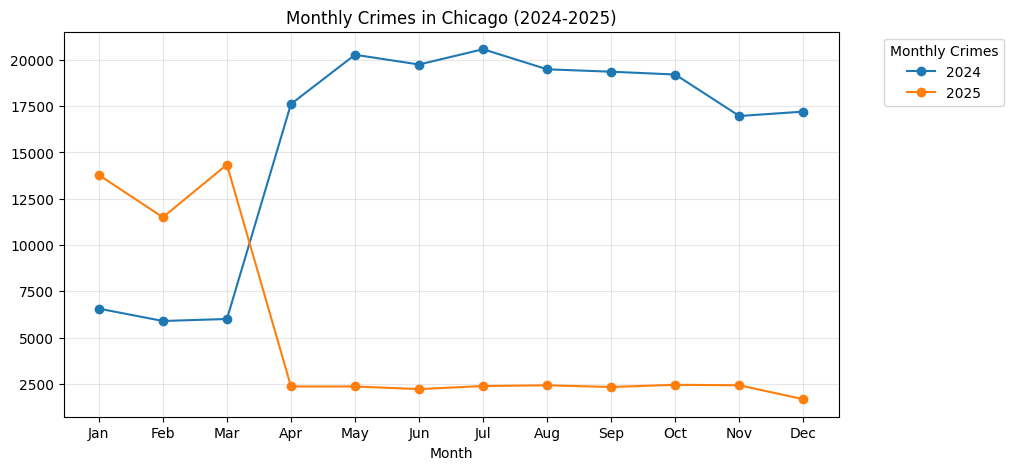

In [33]:
# 1. Group by Year FIRST, then Month (critical order!)
monthly_data = df.groupby(['Year', 'Month']).size()

# 2. Unstack Year to create separate lines for each year
monthly_data = monthly_data.unstack(level=0)

# 3. Plot with clean formatting (only 4 lines!)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Crimes in Chicago (2024-2025)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Monthly Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

INSIGHT 18 : Crime trends over time reveal that in 2025, the number of crimes significantly declined after the first three months. In contrast, during 2024, crime rates started low in the early months but then increased sharply as the year progressed.

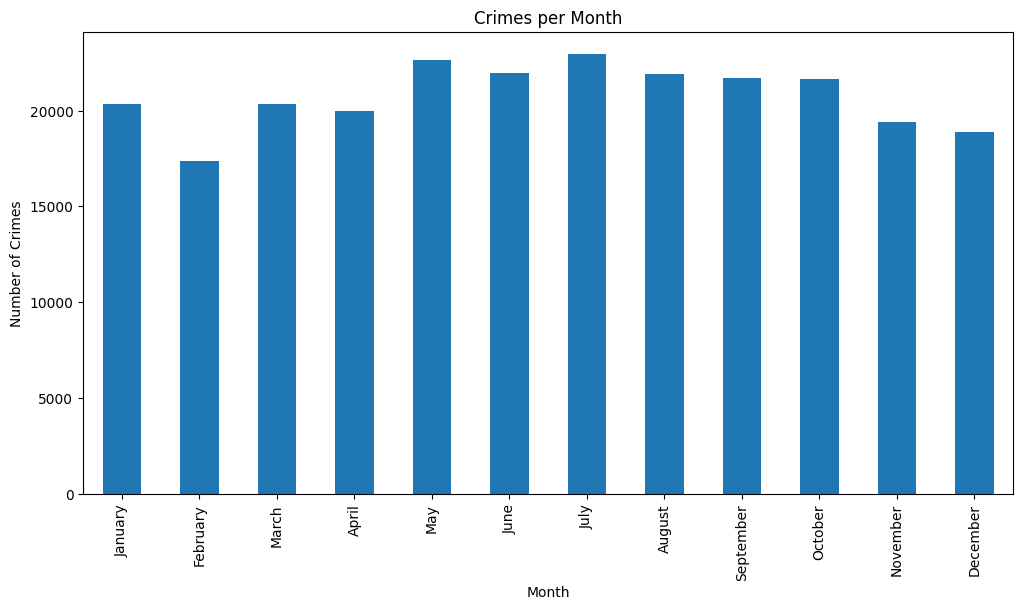

In [34]:
crimes_per_month = df['Month'].value_counts().sort_index()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Replace numerical months with their names
crimes_per_month.index = crimes_per_month.index.map(month_names)

crimes_per_month.plot(kind='bar')
plt.title('Crimes per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 19 : February stands out as the month with the lowest crime rates across the dataset. This trend is consistent across different types of crimes, suggesting seasonal factors may influence criminal activity.

DayOfWeek
Monday       36262
Tuesday      35580
Wednesday    34429
Thursday     35007
Friday       37498
Saturday     35666
Sunday       34681
Name: count, dtype: int64


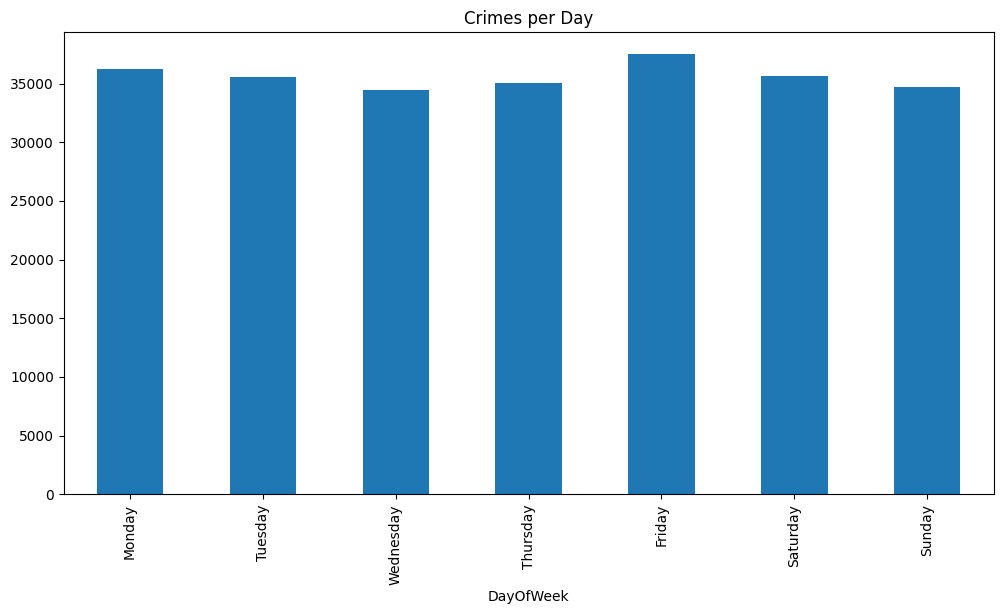

In [35]:
crimes_per_day = df['DayOfWeek'].value_counts().sort_index()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

crimes_per_day.index = crimes_per_day.index.map(day_names)
crimes_per_day.plot(kind='bar')
plt.title('Crimes per Day')
plt.gcf().set_size_inches(12, 6)
print(crimes_per_day)

INSIGHT 20 : As we can see from this data, Friday consistently records the highest number of incidents. This could be related to increased social activities and public gatherings that happen at the end of the work week.

<h1>3. Kidnapping crime anylysis during 2024-2025</h1>

In [36]:
df.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                         category
IUCR                          category
Primary Type                  category
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                      category
Ward                             int64
Community Area                category
FBI Code                      category
X Coordinate                   float64
Y Coordinate                   float64
Year                             int32
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
Month                            int32
Day                              int32
DayOfWeek                        int32
dtype: object

In [37]:
df[df['Primary Type'] == 'KIDNAPPING']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
0    17
1    13
2    13
3    21
4    17
5    10
6    14
Name: count, dtype: int64

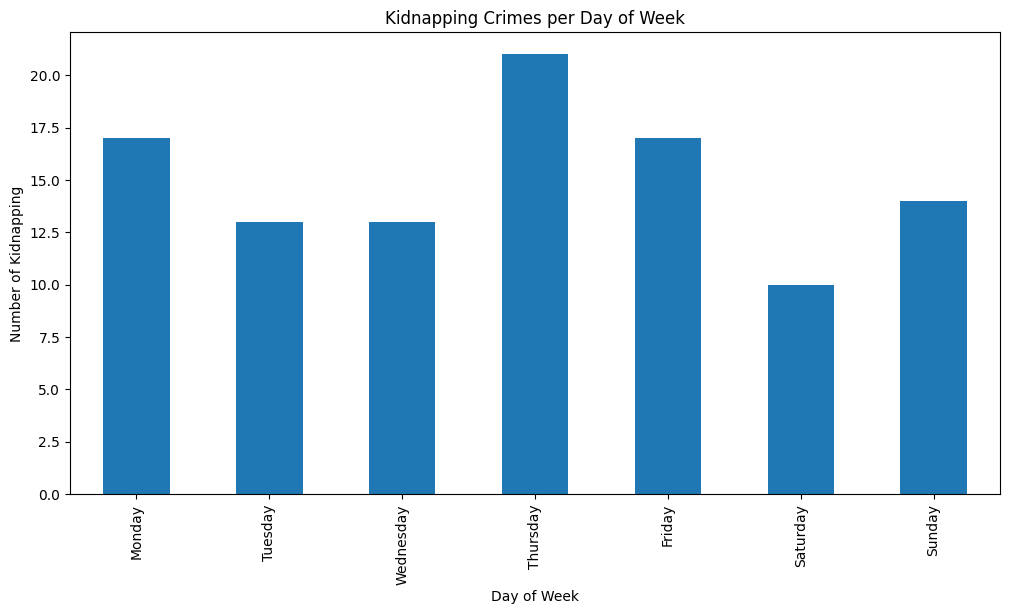

In [38]:
kidnapping_counts = df[df['Primary Type'] == 'KIDNAPPING']['DayOfWeek'].value_counts().sort_index()

# Plot
kidnapping_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Kidnapping Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Kidnapping')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 21 : As we can see from this data, while kidnapping is not the most rampant crime, it still occur and show a noticeable pattern. The data indicates that Thursday is the day with the highest number of reported kidnappings.

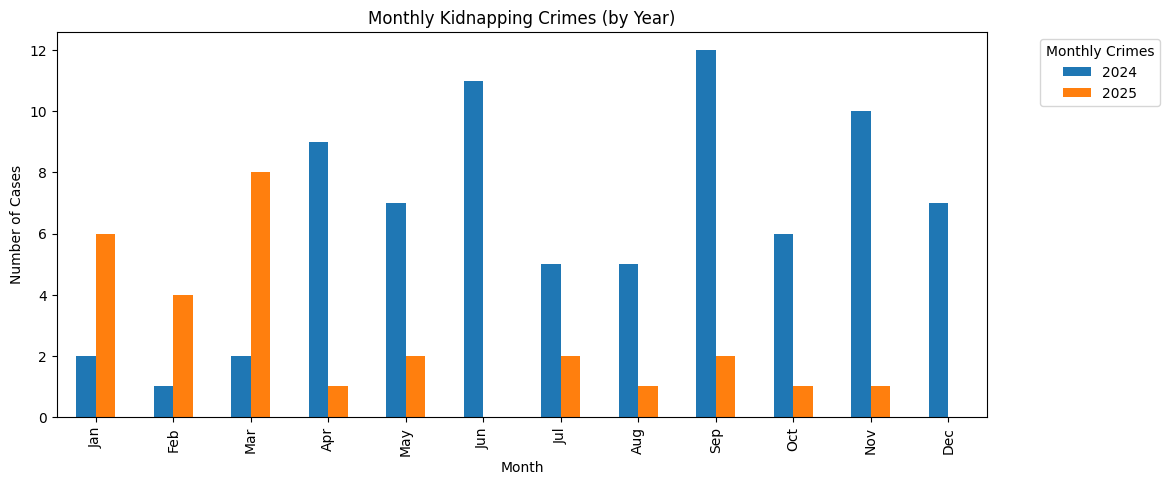

In [39]:
df[df['Primary Type'] == 'KIDNAPPING'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Kidnapping Crimes (by Year)')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 22 : In 2024, February recorded the fewest kidnapping cases, while September had the most. However, in 2025, kidnapping cases dropped significantly compared to the previous year, showing some improvement in this crime category.

<h2>4. Robbery Crime Analysis During 2024-2025</h2>

In [40]:
df[df['Primary Type'] == 'ROBBERY']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
0    1163
1    1118
2    1095
3    1147
4    1266
5    1194
6    1217
Name: count, dtype: int64

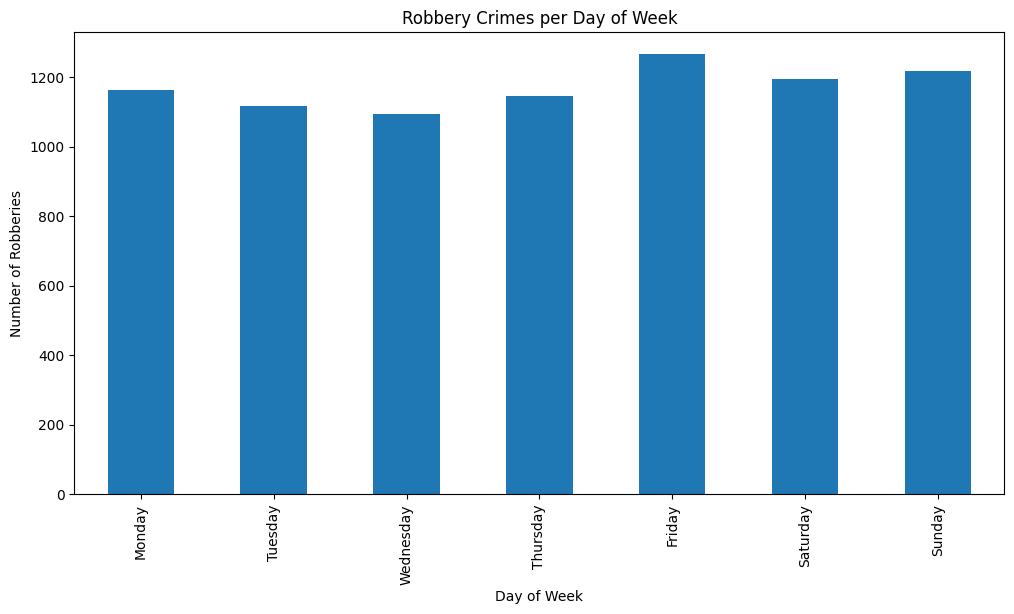

In [41]:
robbery_counts = df[df['Primary Type'] == 'ROBBERY']['DayOfWeek'].value_counts().sort_index()

# Plot
robbery_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Robbery Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Robberies')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 23 : According to this data robbery incidents are most frequent on Fridays. This again emphasizes that the end of the week is a high-risk period for criminal activity.

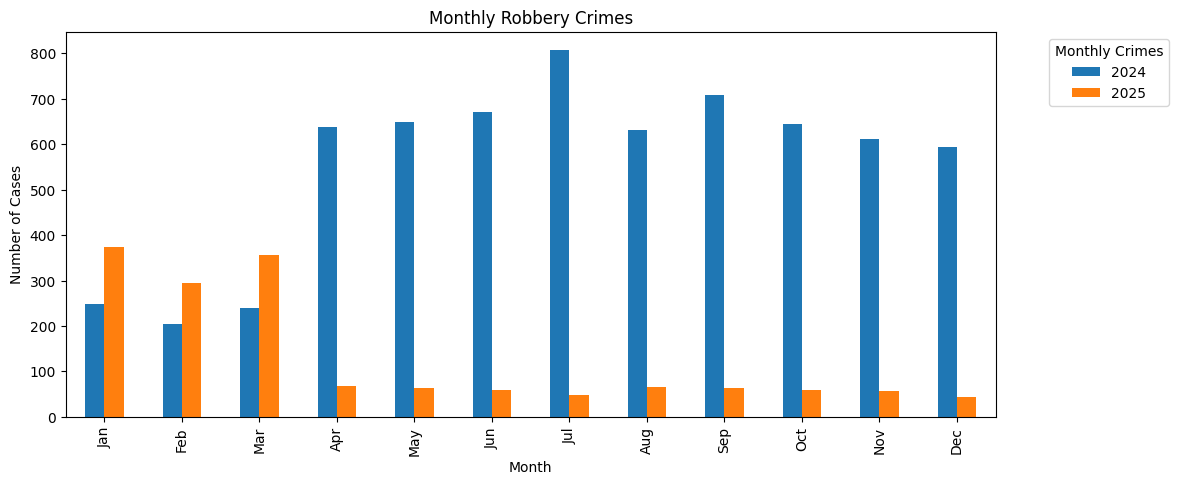

In [42]:
df[df['Primary Type'] == 'ROBBERY'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Robbery Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 24 : In 2024, July recorded the highest number of robbery cases, while February had the lowest. Interestingly, in 2025, robbery cases declined significantly compared to the previous year, showing a downward trend.

<h2>5. Arson Crime Analysis During 2024-2025</h2>

In [43]:
df[df['Primary Type'] == 'ARSON']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
0    53
1    56
2    68
3    80
4    60
5    61
6    74
Name: count, dtype: int64

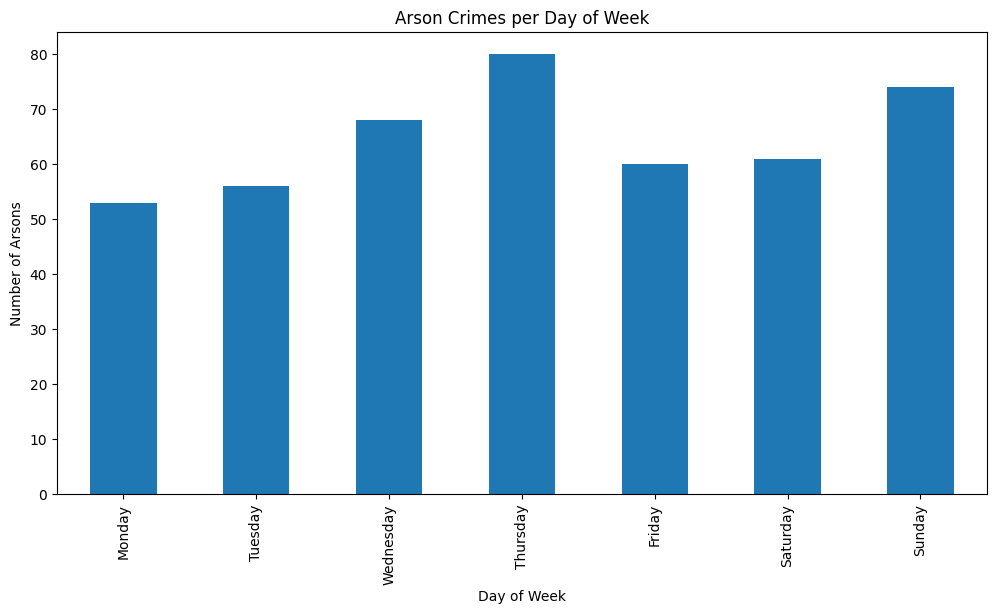

In [44]:
arson_counts = df[df['Primary Type'] == 'ARSON']['DayOfWeek'].value_counts().sort_index()

# Plot
arson_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Arson Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Arsons')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 25 : Arson cases are most frequently reported on Thursdays. This finding adds another day-specific pattern to the dataset, which may be useful for law enforcement in allocating resources.

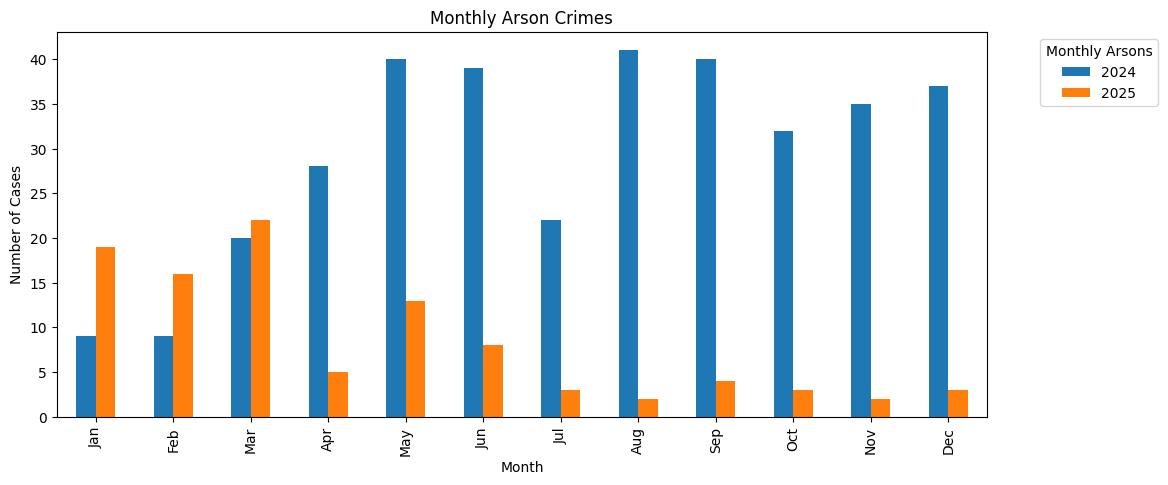

In [45]:
df[df['Primary Type'] == 'ARSON'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Arsons', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Arson Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 26 : The months of May, June, August, and September in 2024 recorded the highest number of arson crimes. This suggests that warmer months may play a role in the increase of such incidents.

<h2>6. Liquor Law Violation Crime Analysis During 2024-2025</h2>

In [46]:
df[df['Primary Type'] == 'LIQUOR LAW VIOLATION']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
0    12
1    22
2    21
3    30
4    49
5    38
6    20
Name: count, dtype: int64

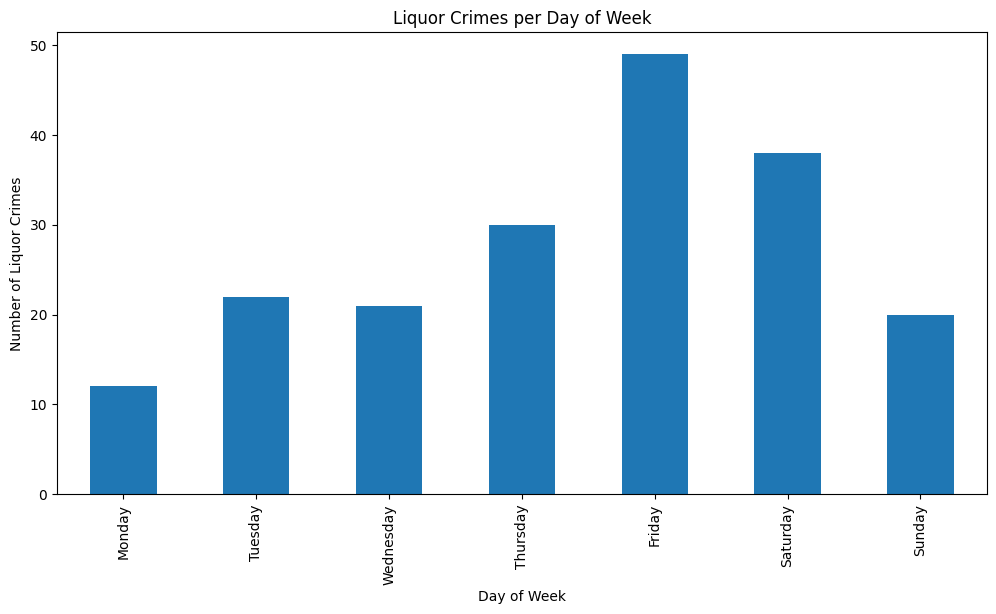

In [47]:
liquor_crimes_counts = df[df['Primary Type'] == 'LIQUOR LAW VIOLATION']['DayOfWeek'].value_counts().sort_index()

# Plot
liquor_crimes_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Liquor Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Liquor Crimes')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 27 : Liquor-related crimes are least common on Mondays, while Fridays record the highest numbers. This finding corresponds with patterns of nightlife activity, which peaks toward the end of the week.

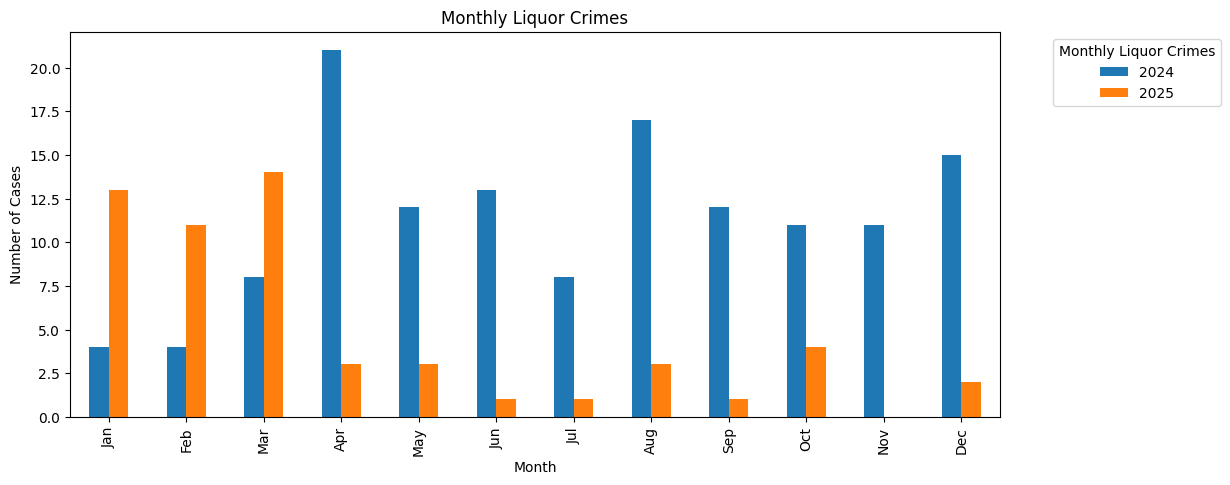

In [48]:
df[df['Primary Type'] == 'LIQUOR LAW VIOLATION'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Liquor Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Liquor Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 28 : In 2024, liquor law violations were relatively low during the first three months of the year. However, starting in April, cases decreased dramatically, with April recording the highest number of incidents overall. However in year 2025 specifically during the month f November, there are no records of liquor crimes.

<h2>7. Battery Crime Analysis During 2024-2025</h2>

In [49]:
df[df['Primary Type'] == 'BATTERY']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
0    6498
1    6151
2    5886
3    5952
4    6639
5    6574
6    6879
Name: count, dtype: int64

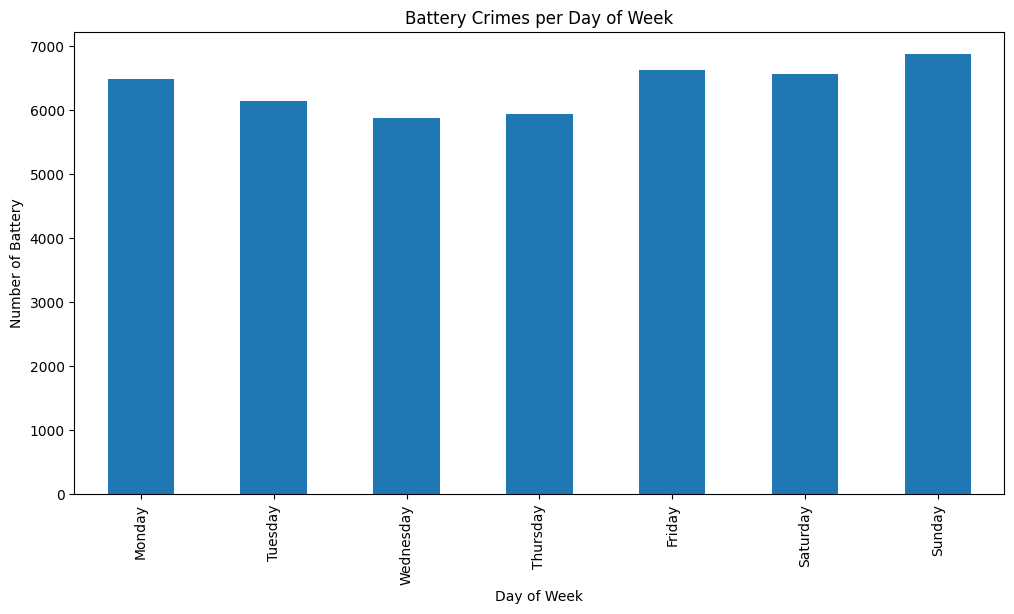

In [50]:
battery_crimes_counts = df[df['Primary Type'] == 'BATTERY']['DayOfWeek'].value_counts().sort_index()

# Plot
battery_crimes_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Battery Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Battery')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 29 : Battery cases are most commonly reported on Sundays. This could be due to increased domestic and social interactions during weekends, which may escalate into conflicts.

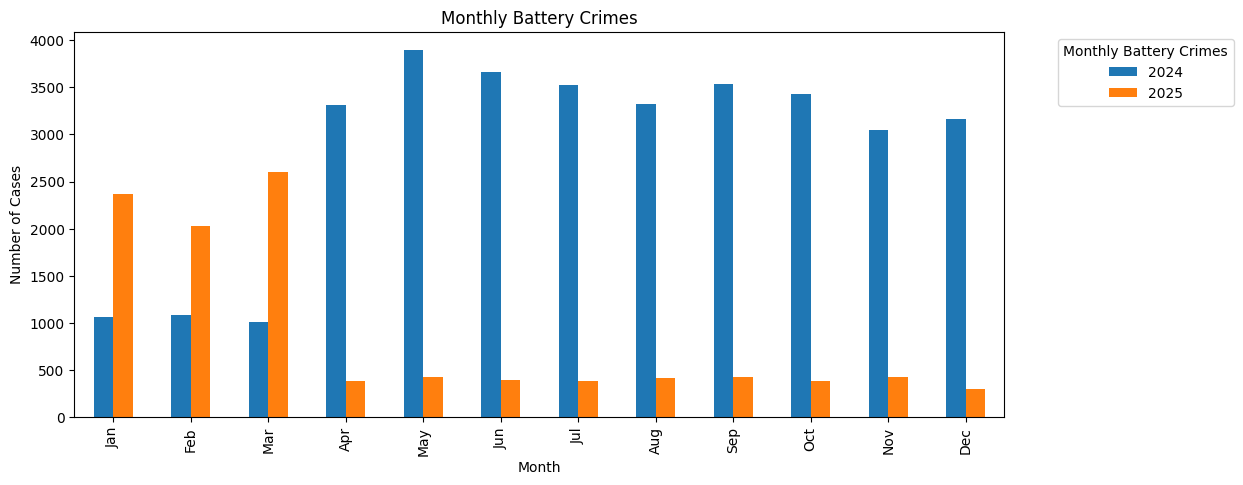

In [51]:
df[df['Primary Type'] == 'BATTERY'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Battery Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Battery Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 30 : Crime trends in this dataset show a recurring pattern across different categories: the first three months of the year typically have low crime rates, followed by a sharp increase in later months. This seasonal pattern suggests cyclical behavior in criminal activity.

<h2>8. Weapons Violation Crime Analysis During 2024-2025</h2>

In [52]:
df[df['Primary Type'] == 'WEAPONS VIOLATION']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
0    1029
1     996
2     947
3     927
4    1098
5    1069
6    1098
Name: count, dtype: int64

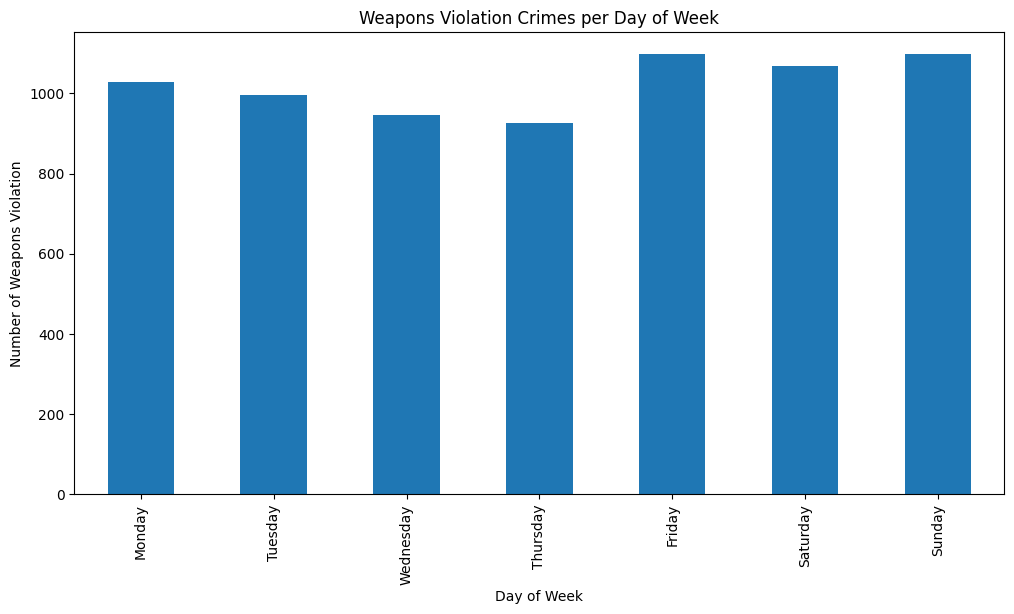

In [53]:
weapons_violation_crimes_counts = df[df['Primary Type'] == 'WEAPONS VIOLATION']['DayOfWeek'].value_counts().sort_index()

# Plot
weapons_violation_crimes_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Weapons Violation Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Weapons Violation')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 31 : Weapons violations occur most frequently on Friday, Saturday and Sunday. These days may represent higher-risk periods when illegal firearm possession or use becomes more common.

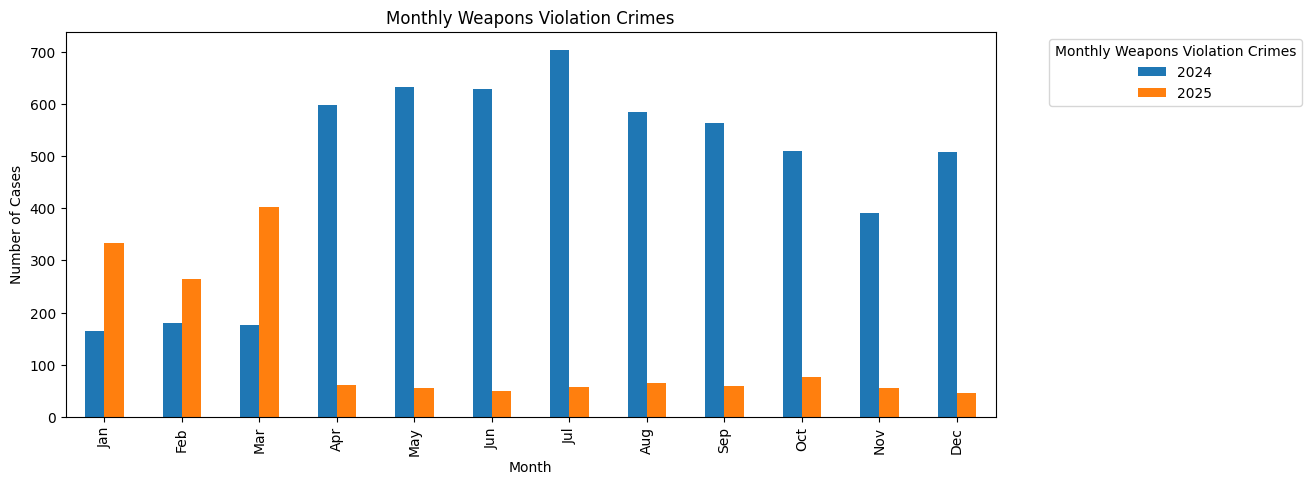

In [54]:
df[df['Primary Type'] == 'WEAPONS VIOLATION'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Weapons Violation Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Weapons Violation Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 32 : During 2024, weapons violations were relatively low in the first three months. However, cases rose sharply afterward, with July recording the highest number of weapon-related offenses.

<h2>9. Theft Crime Analysis During 2024-2025</h2>

In [55]:
df[df['Primary Type'] == 'THEFT']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
0    8495
1    8441
2    8301
3    8580
4    9027
5    8524
6    7833
Name: count, dtype: int64

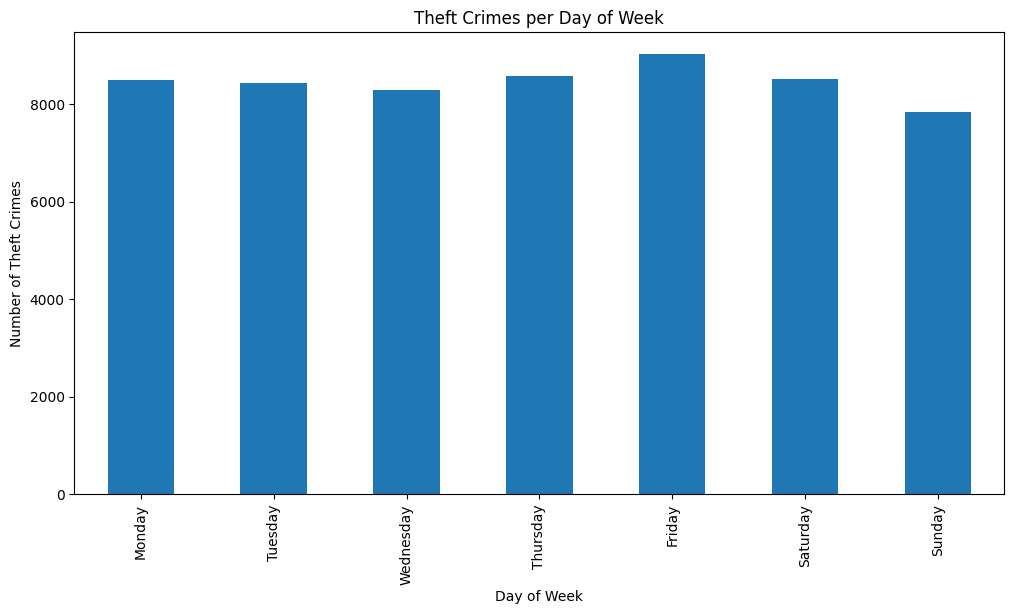

In [56]:
theft_crimes_counts = df[df['Primary Type'] == 'THEFT']['DayOfWeek'].value_counts().sort_index()

# Plot
theft_crimes_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Theft Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Theft Crimes')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 33 : Theft cases occur most frequently on Fridays. This suggests that theft, like many other crimes, spikes toward the end of the week.

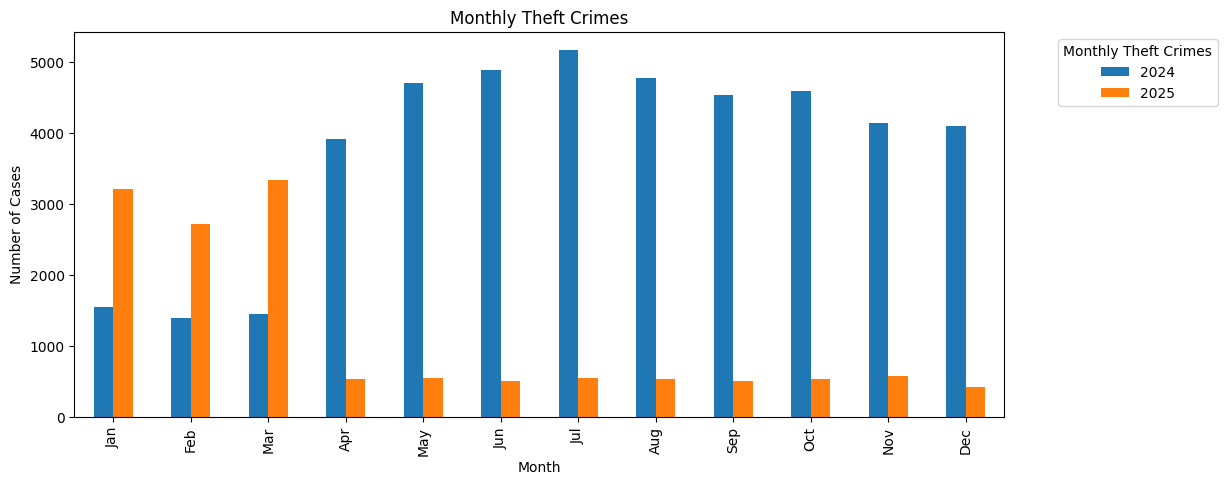

In [57]:
df[df['Primary Type'] == 'THEFT'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Theft Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Theft Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 34 : In 2024, theft cases were highest in July and lowest in March. This demonstrates another seasonal trend in crime patterns, with warmer months seeing more property-related offenses.

<h1>10. Gambling Crime Analysis During 2024-2025 </h1>

In [58]:
df[df['Primary Type'] == 'GAMBLING']['DayOfWeek'].value_counts().sort_index()

DayOfWeek
1    4
2    3
3    3
4    5
5    2
6    1
Name: count, dtype: int64

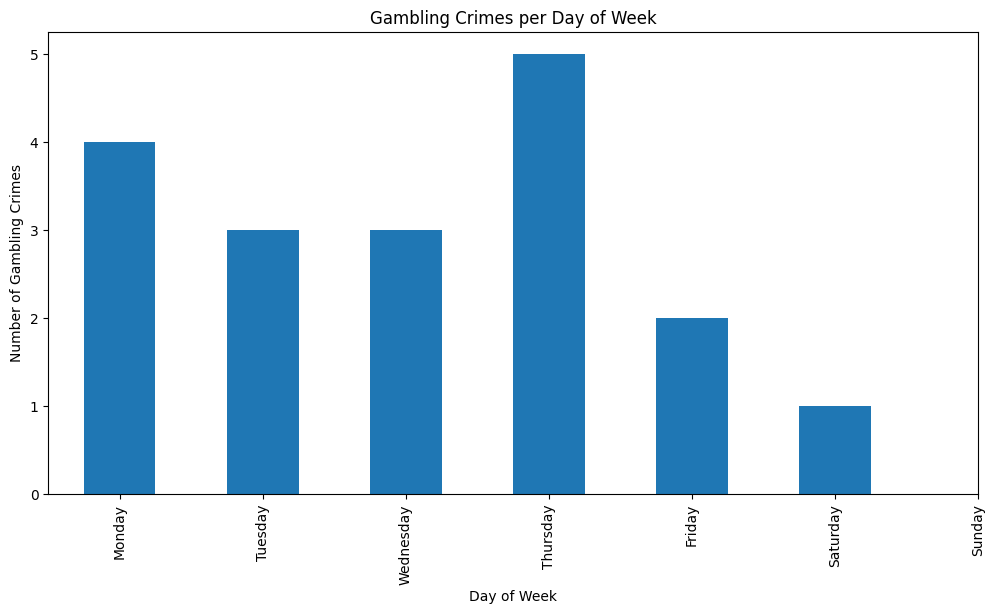

In [59]:
gambling_crimes_counts = df[df['Primary Type'] == 'GAMBLING']['DayOfWeek'].value_counts().sort_index()

# Plot
gambling_crimes_counts.plot(kind='bar')

# Set day names on x-axis
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] )

plt.title('Gambling Crimes per Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Gambling Crimes')
plt.gcf().set_size_inches(12, 6)
plt.show()

INSIGHT 35 : Gambling crimes occur most often on Thursdays, while Saturdays record the lowest cases, and Sundays have no reported cases at all. This shows that gambling-related offenses are not evenly distributed across the week.

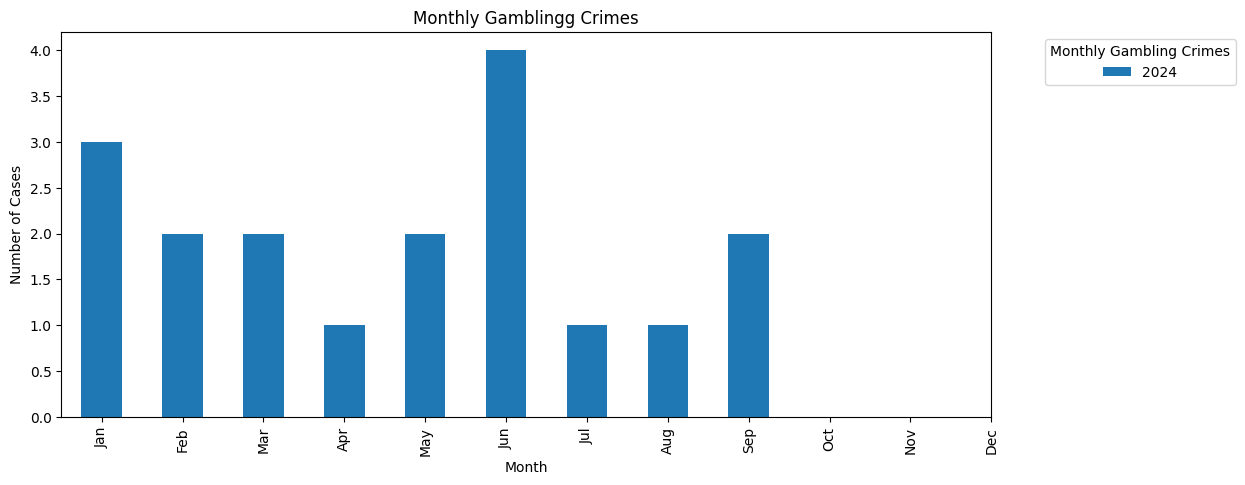

In [60]:
df[df['Primary Type'] == 'GAMBLING'].groupby(['Year','Month']).size().unstack().T.plot(kind='bar')

plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.gcf().set_size_inches(12, 5)
plt.legend(title='Monthly Gambling Crimes', bbox_to_anchor = (1.05,1), loc='upper left')
plt.title('Monthly Gamblingg Crimes')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.show()

INSIGHT 36 : In June, gambling crimes peaked, while no cases were recorded from October through December, as well as in 2025 overall. This suggests that gambling crimes may be sporadic and influenced by specific seasonal or situational factors.